# DESeq2: Basic Differential Expression (DE) analysis

## Objective: Carry out a basic set of DE interaction analysis using DESeq2 and visualize the results

## The objective is to identify genes whose differential effect due to treatment depends on the genotype 

### Load packages

In [1]:
library(tidyverse)
library(DESeq2)
library(dendextend)
library(RColorBrewer)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.2     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    com

### Load the 2019 pilot dds object from image file

In [2]:
curdir <- "/home/jovyan/work/scratch/analysis_output"
imgdir <- file.path(curdir, "img")

imgfile <- file.path(imgdir, "pilotdds2019.RData")

imgfile

attach(imgfile)

tools::md5sum(imgfile)

### List the objects that have been attached
ls(2)

dds2019 <- dds2019

detach(pos = 2)

[1] "/home/jovyan/work/scratch/analysis_output/img/pilotdds2019.RData"

/home/jovyan/work/scratch/analysis_output/img/pilotdds2019.RData 
                              "6632de5c8a2eed06d8c40c958e6f5d03"

[1] "dds2019"

## Before carrying out an interaction analysis, let's review the steps for conducting a DE analysis

### Inspect the dds2019 object

In [3]:
dds2019

class: DESeqDataSet 
dim: 8499 24 
metadata(1): version
assays(1): counts
rownames(8499): CNAG_00001 CNAG_00002 ... large_MTrRNA small_MTrRNA
rowData names(0):
colnames(24): 1_2019_P_M1 2_2019_P_M1 ... 23_2019_P_M1 24_2019_P_M1
colData names(22): Label sample_year ... RIN_normal_threshold
  RIN_lowered_threshold

### Note that the design is additive 

In [4]:
design(dds2019)

~condition + genotype

### The steps for a basic analysis are: estimate size factors, estimate dispersion parameters, and then carry out DE analysis

In [5]:
### First copy dds2019 to ddsadd
ddsadd <- dds2019
### Estimate Size Factors
ddsadd <- estimateSizeFactors(ddsadd)
### Estimate Dispersion parameters (for each gene)
ddsadd <- estimateDispersions(ddsadd)
### Fit NB MLE model
ddsadd <- DESeq(ddsadd)
### Rlog "normalized" expressions
#rldadd <- rlog(ddsadd, blind = TRUE)

gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


### Identify differentially expressed genes with respect to condition using pH4 as reference

In [6]:
results(ddsadd, contrast = c("condition", "pH8", "pH4"), tidy = TRUE) %>%
    arrange(desc(-padj)) %>% 
        head(5)

row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CNAG_00275,1072.9219,-4.048106,0.10667356,-37.94854,0,0
CNAG_00309,539.1312,-3.331524,0.08444635,-39.45137,0,0
CNAG_00409,1093.4775,-5.030655,0.07452918,-67.49913,0,0
CNAG_00531,15371.8856,3.563691,0.05663035,62.92900,0,0
CNAG_00601,506.4752,4.661577,0.09625726,48.42832,0,0


In [7]:
## Interaction analysis

In [8]:
### The first step is to specify the design

In [9]:
### Additive design
ddsmult <- dds2019
design(ddsmult)

~condition + genotype

Update the design by adding the term genotype:condition

In [10]:
design(ddsmult) <- formula(~ genotype + condition + genotype:condition)
design(ddsmult)

~genotype + condition + genotype:condition

In [11]:
### Now repeat the steps: estimate size factors, estimate dispersion followed by the analysis

In [12]:
### Estimate Size Factors
ddsmult <- estimateSizeFactors(ddsmult)
### Estimate Dispersion parameters (for each gene)
ddsmult <- estimateDispersions(ddsmult)
### Fit NB MLE model
ddsmultres <- DESeq(ddsmult)
### Rlog "normalized" expressions
#rldmult <- rlog(ddsmult, blind = TRUE)

gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


Look at the results (compare the first line to that of the DE analysis

In [13]:
results(ddsmultres)

log2 fold change (MLE): genotypeWT.conditionpH8 
Wald test p-value: genotypeWT.conditionpH8 
DataFrame with 8499 rows and 6 columns
                        baseMean     log2FoldChange              lfcSE
                       <numeric>          <numeric>          <numeric>
CNAG_00001                     0                 NA                 NA
CNAG_00002      192.456384076694 -0.103408237109234  0.162208795540166
CNAG_00003      164.990819436254  0.639703164323634  0.158566362520624
CNAG_00004      571.054651467718 -0.149923491484726 0.0875861185206605
CNAG_00005      28.7106195205257   0.38872615882583  0.383575916608188
...                          ...                ...                ...
ENSRNA049551942                0                 NA                 NA
ENSRNA049551964                0                 NA                 NA
ENSRNA049551993                0                 NA                 NA
large_MTrRNA    5333.97356461621   0.25675256982063  0.261942681080193
small_MTrRNA    

List the top 5 hits with respect to adjusted P-value

In [14]:
results(ddsmultres, tidy = TRUE) %>%
    arrange(desc(-padj)) %>%
        head(5)

row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CNAG_06237,2425.9011,1.445970,0.06535452,22.12503,1.815272e-108,1.479628e-104
CNAG_01768,5493.5145,-2.012335,0.09770819,-20.59535,3.020861e-94,1.231152e-90
CNAG_04901,475.3418,-3.273870,0.16064794,-20.37916,2.560031e-92,6.955603e-89
CNAG_06658,2332.5964,-1.550563,0.08436115,-18.38006,1.897740e-75,3.867120e-72
CNAG_03518,399.4864,3.091738,0.16854953,18.34320,3.741012e-75,6.098599e-72


Visualize the results

In [15]:
### Merge gene expression with meta data
myDEplotData <- function(mydds, geneid, mergelab) {
    counts(mydds, normalize = TRUE) %>%
        as_tibble(rownames="gene") %>%
        filter(gene == geneid) %>%
        gather(Label, geneexp, -gene) %>%
        select(-gene) -> genedat

    colData(mydds) %>%
        as.data.frame %>%
        as_tibble %>%
        full_join(genedat, by = mergelab) -> genedat
    
    return(genedat)
}


### Alow for coloring with respect to another factor
myDEplot <- function(mydds, geneid, grpvar, colvar, mergelab) {
    mydat <- myDEplotData(mydds, geneid, mergelab)
    ggplot(mydat, aes_string(x=grpvar, y = "geneexp", col = colvar))+ geom_point()
}

Compare the DE effect of condition within WT compares to sre1d. This suggests that the DE with respect to condition depends on genotype. 

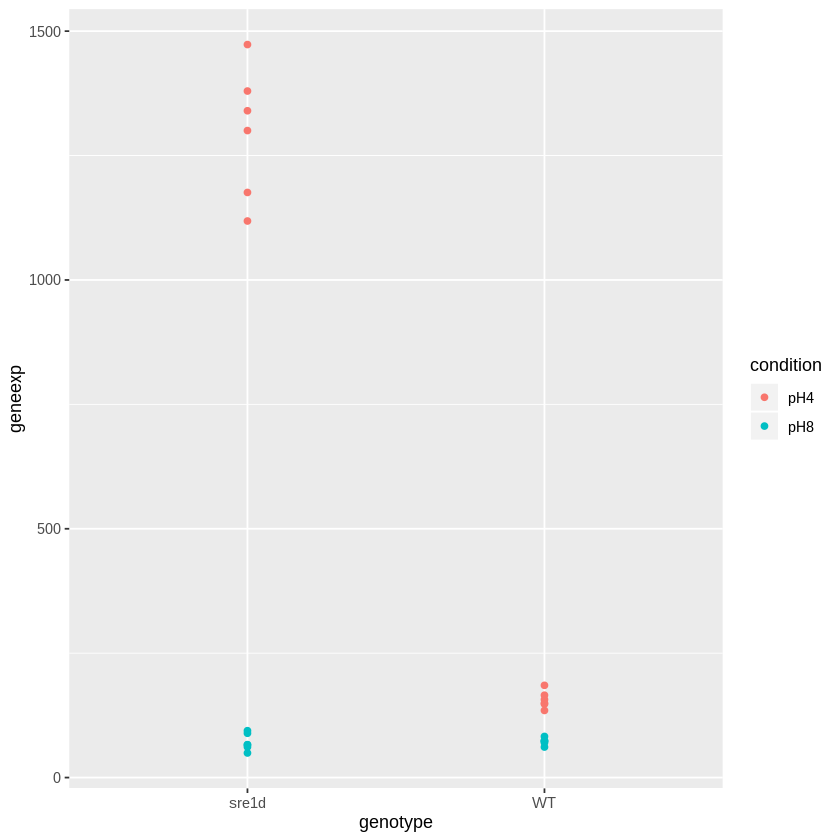

In [16]:
myDEplot(ddsmult, "CNAG_03518", "genotype", "condition", "Label")

##Exercise: Compare the size factors and dispersion estimates between ddsmult and ddsad

## Estimate DE effect due to condition given genotype

### Define a group variable

In [26]:
ddsgrp <- dds2019
### DESeq2 requires factors
ddsgrp$group <- as.factor(paste0(ddsgrp$condition, ddsgrp$genotype))
ddsgrp$group

[1] pH4WT    pH4WT    pH4WT    pH4WT    pH4WT    pH4WT    pH4sre1d pH4sre1d
 [9] pH4sre1d pH4sre1d pH4sre1d pH4sre1d pH8WT    pH8WT    pH8WT    pH8WT   
[17] pH8WT    pH8WT    pH8sre1d pH8sre1d pH8sre1d pH8sre1d pH8sre1d pH8sre1d
Levels: pH4sre1d pH4WT pH8sre1d pH8WT

### Set design

In [27]:
design(ddsgrp) <- formula(~group)
ddsgrp@design

~group

In [28]:
ddsgrp
### Estimate Size Factors
ddsgrp <- estimateSizeFactors(ddsgrp)
### Estimate Dispersion parameters (for each gene)
ddsgrp <- estimateDispersions(ddsgrp)
### Fit NB MLE model
ddsgrpres <- DESeq(ddsgrp)
### Rlog "normalized" expressions
#rldmult <- rlog(ddsmult, blind = TRUE)

class: DESeqDataSet 
dim: 8499 24 
metadata(1): version
assays(1): counts
rownames(8499): CNAG_00001 CNAG_00002 ... large_MTrRNA small_MTrRNA
rowData names(0):
colnames(24): 1_2019_P_M1 2_2019_P_M1 ... 23_2019_P_M1 24_2019_P_M1
colData names(22): Label sample_year ... RIN_normal_threshold
  RIN_lowered_threshold

gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


### Generate results for CNAG_03518

In [31]:
### Results for interaction analysis
r0<-results(ddsgrpres, tidy=TRUE)
### Contrast treatments within WT strain
r1<-results(ddsgrpres, contrast = c("group", "pH8WT", "pH4WT"), tidy=TRUE)
### Contrast treatments within sre1d strain
r2<-results(ddsgrpres, contrast = c("group", "pH8sre1d", "pH4sre1d"), tidy=TRUE)

In [33]:
r0 %>% filter(row == "CNAG_03518")
r1 %>% filter(row == "CNAG_03518")
r2 %>% filter(row == "CNAG_03518")

row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CNAG_03518,399.4864,-4.15704,0.1141264,-36.42487,1.720166e-290,3.78948e-288


row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CNAG_03518,399.4864,-1.106679,0.1195981,-9.253317,2.176323e-20,9.58358e-20


row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CNAG_03518,399.4864,-4.198417,0.1187655,-35.35049,9.853941e-274,1.460354e-271


In [17]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 9 (stretch)

Matrix products: default
BLAS:   /usr/lib/openblas-base/libblas.so.3
LAPACK: /usr/lib/libopenblasp-r0.2.19.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] RColorBrewer_1.1-2          dendextend_1.12.0          
 [3] DESeq2_1.24.0               SummarizedExperiment_1.14.0
 [5] DelayedArray_0.10.0         BiocParallel_1.18.0        
 [7] matrixStats_0.54.0          Biobase_2.44.0             
 [9] GenomicRanges_1.